In [41]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf

In [42]:
# Use pd.read_csv() to read the CSV file into a DataFrame.
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [47]:
# Visualize the top elements of features
train_data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [ ]:
nulls = train_data.isnull().sum()
train_data.keys()


# 1: EDA

In [51]:
# Identify the datatype we are dealing with
train_data.dtypes

Id                      int64
Product_Info_1          int64
Product_Info_2         object
Product_Info_3          int64
Product_Info_4        float64
                       ...   
Medical_Keyword_45      int64
Medical_Keyword_46      int64
Medical_Keyword_47      int64
Medical_Keyword_48      int64
Response                int64
Length: 128, dtype: object

In [55]:
# Dataframe summary stats
train_data.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


| Variable             | Description                                                                                      |
|----------------------|--------------------------------------------------------------------------------------------------|
| Id                   | A unique identifier associated with an application.                                               |
| Product_Info_1-7     | A set of normalized variables relating to the product applied for.                                |
| Ins_Age              | Normalized age of the applicant.                                                                 |
| Ht                   | Normalized height of the applicant.                                                              |
| Wt                   | Normalized weight of the applicant.                                                              |
| BMI                  | Normalized BMI of the applicant.                                                                 |
| Employment_Info_1-6  | A set of normalized variables relating to the employment history of the applicant.               |
| InsuredInfo_1-6      | A set of normalized variables providing information about the applicant.                            |
| Insurance_History_1-9| A set of normalized variables relating to the insurance history of the applicant.                 |
| Family_Hist_1-5      | A set of normalized variables relating to the family history of the applicant.                    |
| Medical_History_1-41 | A set of normalized variables relating to the medical history of the applicant.                   |
| Medical_Keyword_1-48 | A set of dummy variables relating to the presence/absence of a medical keyword associated with the application. |
| Response             | This is the target variable, an ordinal variable relating to the final decision associated with an application. |


In [69]:
# Create input data for model
X_train = train_data.drop(['Id','Response'],axis=1)
y_train = train_data['Response']

N,D = X_train.shape


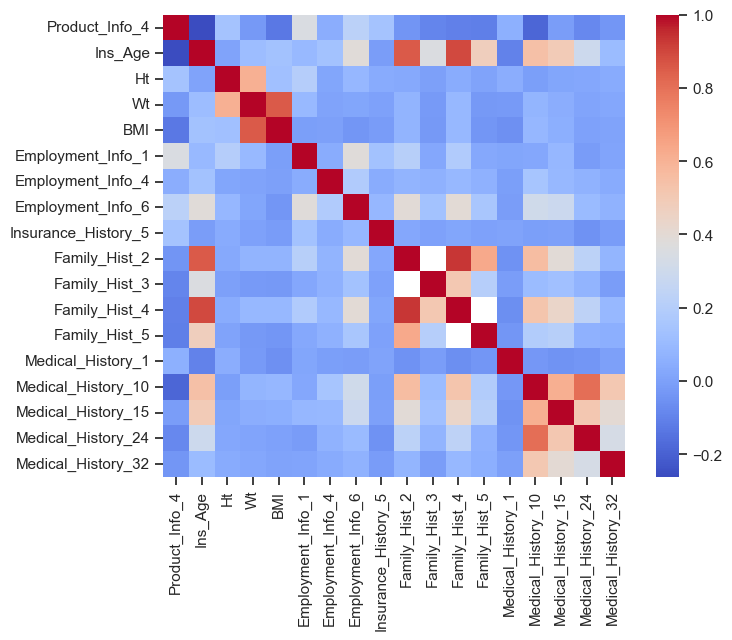

In [74]:
# Select only the columns with floating-point data (float64)
float_columns = X_train.select_dtypes(include=['float64'])


# Create a scatterplot matrix using Seaborn
sns.set(style="ticks")

# Calculate the correlation matrix
correlation_matrix = X_train[float_columns.columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", square=True)

# sns.pairplot(X_train[float_columns.columns], kind="scatter", diag_kind="kde")

# Show the plot
plt.show()



# 2: Create classifier model

In [71]:

# Rescale variables
from sklearn.preprocessing import StandardScaler  #rescale data
scaler = StandardScaler()
# Fit and transform the selected columns
scaled_data = scaler.fit_transform(float_columns)

# Replace the original float columns with the scaled values
X_train[float_columns.columns] = scaled_data

X_train

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,D3,10,-0.891949,2,1,1,1.197962,-1.690031,-1.617886,...,0,0,0,0,0,0,0,0,0,0
1,1,A1,26,-0.891949,2,3,1,-1.753982,-1.445119,-1.805858,...,0,0,0,0,0,0,0,0,0,0
2,1,E1,26,-0.891949,2,3,1,-1.905363,0.514174,-0.043622,...,0,0,0,0,0,0,0,0,0,0
3,1,D4,10,0.559979,2,3,1,-1.224146,-0.465473,-0.983481,...,0,0,0,0,0,0,0,0,0,0
4,1,D2,26,-0.347476,2,3,1,0.062599,-0.710384,-0.654530,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,1,D1,10,-0.347476,2,3,1,-1.678291,0.024351,0.308826,...,0,0,0,0,0,0,0,0,0,0
59377,1,D3,26,-0.347476,2,3,1,0.138290,1.248909,1.248685,...,0,0,0,0,0,0,0,0,0,0
59378,1,E1,26,-0.891949,2,3,1,-1.526909,0.514174,-0.513551,...,0,0,0,0,0,0,0,0,0,0
59379,1,D2,10,-0.347476,2,3,1,0.516744,-0.220561,-0.184601,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1,activation='sigmoid')
])